#  **One-Dimensional Search Algorithm**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1WfsbEp7I3f0nxBcKRS1g-UeaDrOm4Jpc?usp=sharing)

1. Establish an error tolerance $ε$. Determine an $x_u$ such that $df(x_u)/dx ≤ 0$ and an $x_l$ such that $df(x_l)/dx ≥ 0$. <br> 
2. Compute a new trial solution $x = (x_u + x_l)/2$.<br> 
3. If $x_u – x_l ≤ ε$, then terminate. The current approximation is within the established error tolerance of $x^*$.<br > 
4. If $df(x)/dx ≥ 0$, set $x_l = x$.<br> 
5. If $df(x)/dx ≤ 0$, set $x_u = x$.<br> 
6. Go to Step 2 <br> 

<ul />

**Example 5.2**

The algorithm can be illustrated by the problem of maximizing

$$f(x) = x^4 - 16x^3 + 91x^2 - 216x + 180$$

over the range $3.2 \leq x \leq 5.0$, which is shown in **Figure 5.7**. The function is certainly concave in the range $3.2 \leq x \leq 5.0$, so we will apply the search to that range.

The derivative $df(x)/dx = 4x^3 - 48x^2 + 182x - 216$ will be used during the procedure.

$\text{1. }x_u = 5.0$, $x_l = 3.2$, and let $\epsilon = 0.15$ <br>
$\text{2. }x = (5.0 + 3.2)/2 = 4.1$ <br>
$\text{3. }5.0 - 3.2 = 1.8 > \epsilon$ <br>
$\text{4. }df(x)/dx$ at $x = 4.1$ is equal to -0.996 < 0, so set $x_u = 4.1$ and leave $x_l = 3.2$ <br>
$\text{2. }  x = 3.65$ <br>
$\text{3. }4.1 - 3.2 = 0.9 > \epsilon$ <br>
$\text{4. }df(x)/dx$ at $x = 3.65$ is equal to 3.328 > 0, so set $x_l = 3.65$ and leave $x_u = 4.1$ <br>
$\text{2. }x = 3.875$ <br>
$\text{3. }4.1 - 3.65 = 0.45 > \epsilon$ <br>
$\text{4. }df(x)/dx$ at $x = 3.875$ is equal to 1.242 > 0, so set $x_l = 3.875$ and leave $x_u = 4.1$ <br>
$\text{2. }x = 3.988$ <br>
$\text{3. }4.1 - 3.875 = 0.225 > \epsilon$ <br>
 <br>

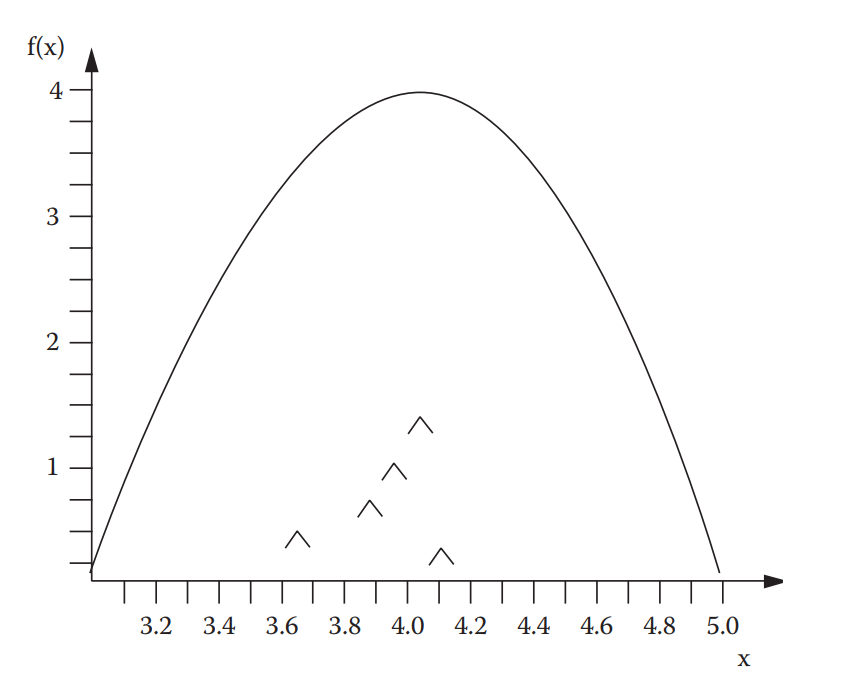

**FIGURE 5.7** <br>
$f(x) = x4 – 16x3 + 91x2 – 216x + 180$.


4.  $df(x)/dx$ at $x = 3.988$ is equal to $0.12 > 0$, so set $x_l = 3.988$ and leave $x_u = 4.1$ <br> 
2.  $x = 4.044$ <br> 
3.  $4.1 - 3.988 = 0.112 < \epsilon$, so the process terminates with the current trial solution $x = 4.044$ and a function value of 3.99 <br> 

Notice that at the point $x = 4.044$, the derivative of $f(x)$ is $-0.44$ (close to zero); and at the true optimum of $x = 4$, where $f(x) = 4$, the derivative is exactly zero, a necessary condition for optimality.

Other methods for a one-dimensional search include the **Fibonacci method** and a related technique called the **golden section method**. These methods are discussed and compared in Wilde (1964). The golden section search is based strictly on the use of function evaluations, and is particularly useful when first derivatives are not available. (See Exercise 5.6.)

While a single-variable search method may seem too simplistic for practical nonlinear optimization problems, such methods are often incorporated into more elaborate multivariate search procedures, and therefore warrant our awareness and understanding.

</ul>

Iter |      x_l |      x_u |      x_r |    f'(x_l) |    f'(x_r) | Width
----------------------------------------------------------------------
   1 |   3.2000 |   5.0000 |   4.1000 |     5.9520 |    -0.9960 |   1.8000
   2 |   3.2000 |   4.1000 |   3.6500 |     5.9520 |     3.3285 |   0.9000
   3 |   3.6500 |   4.1000 |   3.8750 |     3.3285 |     1.2422 |   0.4500
   4 |   3.8750 |   4.1000 |   3.9875 |     1.2422 |     0.1250 |   0.2250

Final Result:
x_opt ≈ 4.04375
f(x_opt) ≈ 3.99043


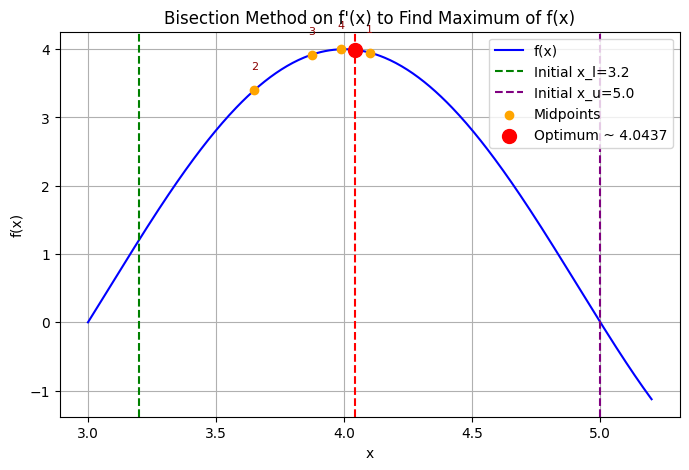

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BisectionOptimizer:
    def __init__(self, f_func, df_func, xl_init, xu_init, eps):
        self.f = f_func
        self.df = df_func
        self.xl_init = float(xl_init)
        self.xu_init = float(xu_init)
        self.eps = float(eps)
        self.x_opt = None
        self.iter_data = []

    def optimize(self):
        xl = self.xl_init
        xu = self.xu_init
        
        print(f"{'Iter':>4} | {'x_l':>8} | {'x_u':>8} | {'x_r':>8} | {'f\'(x_l)':>10} | {'f\'(x_r)':>10} | Width")
        print("-"*70)

        while (xu - xl) > self.eps:
            xr = (xl + xu) / 2
            f_l = self.df(xl)
            f_r = self.df(xr)

            self.iter_data.append((xl, xu, xr, f_l, f_r))
            print(f"{len(self.iter_data):4d} | {xl:8.4f} | {xu:8.4f} | {xr:8.4f} | {f_l:10.4f} | {f_r:10.4f} | {xu - xl:8.4f}")

            if f_l * f_r < 0:
                xu = xr
            else:
                xl = xr

        self.x_opt = (xl + xu) / 2
        
        print("\nFinal Result:")
        print(f"x_opt ≈ {self.x_opt:.5f}")
        print(f"f(x_opt) ≈ {self.f(self.x_opt):.5f}")

    def plot_results(self):
        if not self.iter_data:
            print("No optimization data to plot. Please run optimize() first.")
            return

        x_vals = np.linspace(self.xl_init - 0.2, self.xu_init + 0.2, 400)
        y_vals = self.f(x_vals)

        plt.figure(figsize=(8,5))
        plt.plot(x_vals, y_vals, label="f(x)", color="blue")

        # Initial bounds
        plt.axvline(self.xl_init, color="green", linestyle="--", label=f"Initial x_l={self.xl_init}")
        plt.axvline(self.xu_init, color="purple", linestyle="--", label=f"Initial x_u={self.xu_init}")

        # Midpoints from iterations
        mids = [step[2] for step in self.iter_data]
        mids_y = [self.f(m) for m in mids]
        plt.scatter(mids, mids_y, color="orange", zorder=5, label="Midpoints")

        # Label each midpoint with iteration number
        for i, (m, y) in enumerate(zip(mids, mids_y), 1):
            plt.text(m, y+0.3, str(i), fontsize=8, ha='center', color="darkred")

        # Final optimum
        plt.scatter(self.x_opt, self.f(self.x_opt), color="red", s=100, zorder=6, label=f"Optimum ~ {self.x_opt:.4f}")
        plt.axvline(self.x_opt, color="red", linestyle="--")

        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Bisection Method on f'(x) to Find Maximum of f(x)")
        plt.legend()
        plt.grid(True)
        plt.show()

# --- Main execution ---
if __name__ == "__main__":
    def f(x):
        return x**4 - 16*x**3 + 91*x**2 - 216*x + 180

    def df(x):
        return 4*x**3 - 48*x**2 + 182*x - 216
    
    # Set initial parameters
    xl_init = 3.2
    xu_init = 5.0
    eps = 0.15

    # Create an instance of the optimizer
    optimizer = BisectionOptimizer(f, df, xl_init, xu_init, eps)

    # Run the optimization and plot the results
    optimizer.optimize()
    optimizer.plot_results()